In [1]:
from astropy.io import fits
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import sys
import xidplus
import pickle
import scipy.stats as stats
from scipy.stats import norm
from astropy import wcs


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#---Read in truth catalogue---
folder='/Users/pdh21/HELP/XID_plus_output/sims/lacy/'
#'/research/astro/fir/cclarke/lacey/released/'
hdulist=fits.open(folder+'lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits')
fcat_sim=hdulist[1].data
hdulist.close()

fcat_sim=fcat_sim[fcat_sim['S100']>0.050]

In [3]:
#Folder containing maps
imfolder='../test_files/'
#field
field='COSMOS'
#SMAP version
SMAPv='4.2'


# In[7]:

pswfits=imfolder+'cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PSW_hipe.fits.gz'#SPIRE 250 map
pmwfits=imfolder+'cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PMW_hipe.fits.gz'#SPIRE 350 map
plwfits=imfolder+'cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PLW_hipe.fits.gz'#SPIRE 500 map

In [4]:
#-----250-------------
hdulist_250 = fits.open(pswfits)

#-----350-------------
hdulist_350 = fits.open(pmwfits)

#-----500-------------
hdulist_500 = fits.open(plwfits)



In [5]:
import sys
sys.path.append('/Users/pdh21/Python/stacking/')
from stacking import stack_image


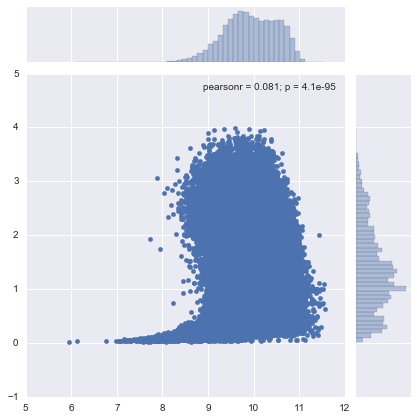

In [6]:
import seaborn as sns
sns.set(color_codes=True)
plot=sns.jointplot(np.log10(fcat_sim['MSTARS_TOT']),fcat_sim['Z_OBS'])


In [7]:
bins=np.linspace(np.min(np.log10(fcat_sim['MSTARS_TOT'])),np.max(np.log10(fcat_sim['MSTARS_TOT'])),num=20,endpoint=True,)
bins=np.linspace(8,11,num=20,endpoint=True,)

In [34]:
inds = np.digitize(np.log10(fcat_sim['MSTARS_TOT']), bins)
S250_Mstar=np.empty((bins.size+1))
S250_Mstar_truth=np.empty((bins.size+1))


In [30]:
hdulist_250[1].data[np.isnan(hdulist_250[1].data*1000.0)]=0.0


number of galaxies: 200
number of galaxies: 123
number of galaxies: 177
number of galaxies: 316
number of galaxies: 521
number of galaxies: 864
number of galaxies: 1385
number of galaxies: 2127
number of galaxies: 2862
number of galaxies: 4248
number of galaxies: 5484
number of galaxies: 6361
number of galaxies: 6422
number of galaxies: 5762
number of galaxies: 5416
number of galaxies: 5243
number of galaxies: 5344
number of galaxies: 5376
number of galaxies: 4156
number of galaxies: 1891
number of galaxies: 546


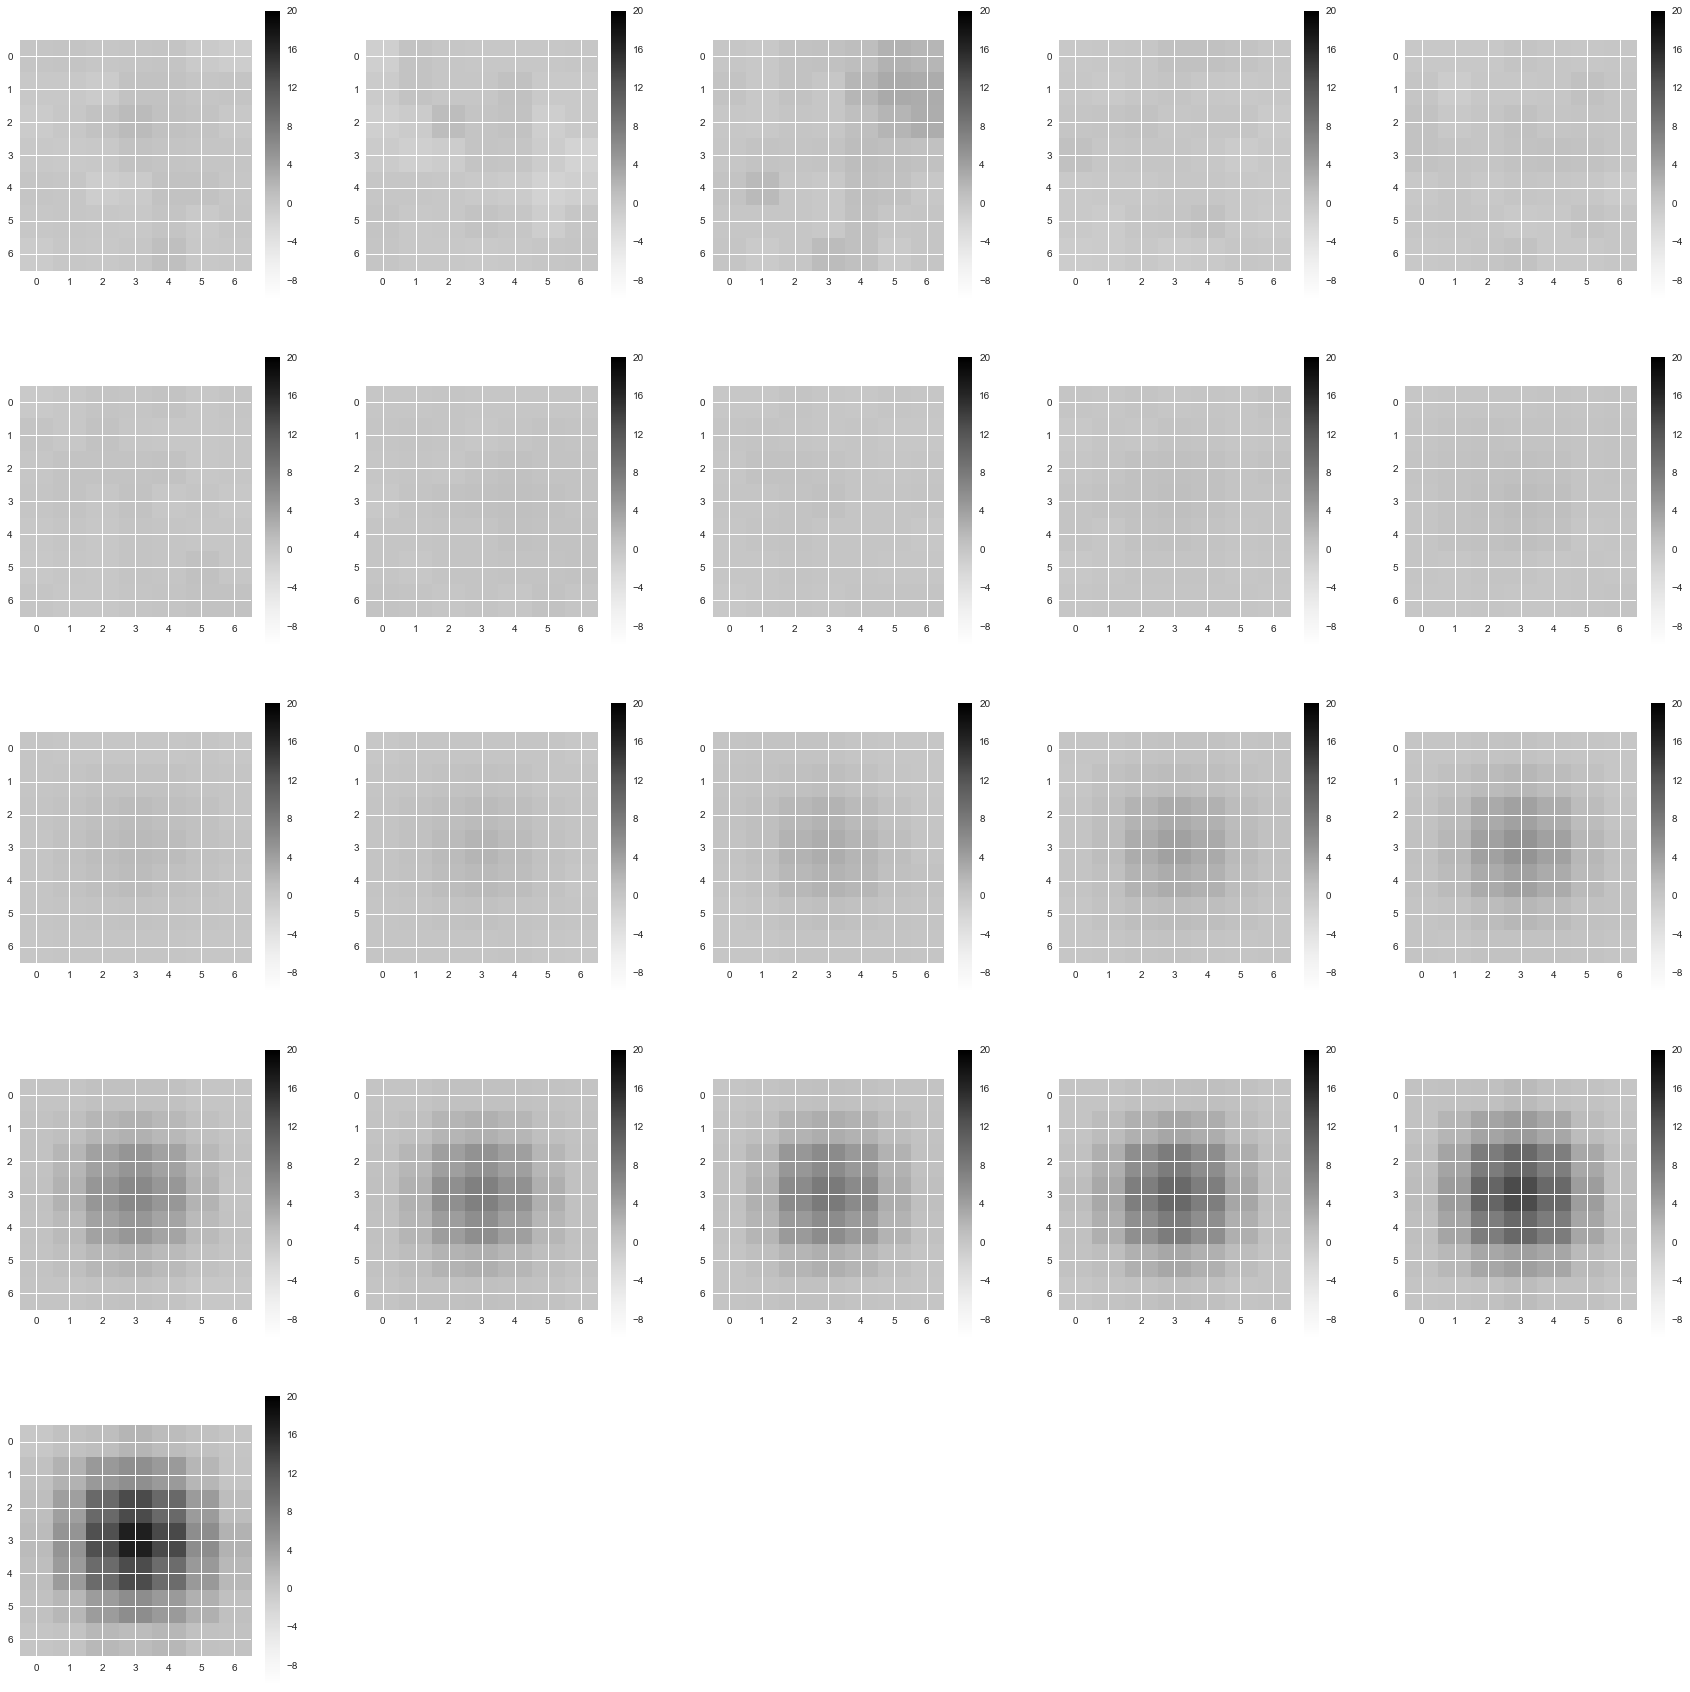

In [37]:
fig = plt.figure(figsize=(30,30))
for i in range(0,bins.size+1):
    src_boost=False
    ra=fcat_sim['RA'][np.where(inds==i)[0]]
    dec=fcat_sim['DEC'][np.where(inds==i)[0]]
    meanStack250, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(hdulist_250[1].data*1000.0,hdulist_250[1].header,ra,dec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
    plt.subplot(5,5,i+1)
    plt.imshow(meanStack250, interpolation='nearest',vmin=-10,vmax=20)
    plt.colorbar()
    S250_Mstar[i]=meanStack250[3,3]
    S250_Mstar_truth[i]=np.mean(fcat_sim['S250'][np.where(inds==i)[0]])

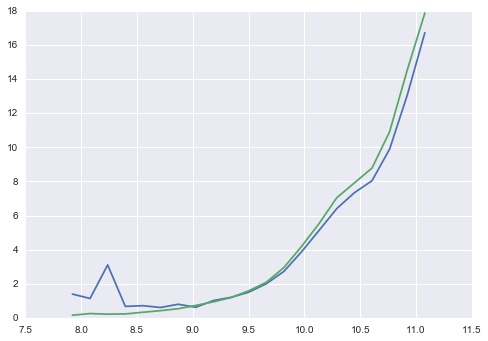

In [36]:
plt.plot(np.append(bins-(bins[1]-bins[0])/2.0,bins[-1]+(bins[1]-bins[0])/2.0),S250_Mstar)
plt.plot(np.append(bins-(bins[1]-bins[0])/2.0,bins[-1]+(bins[1]-bins[0])/2.0),S250_Mstar_truth)

In [57]:
samples=np.empty((100,9))
ii=0
for i in range(0,3):
    for j in range(0,3):
        samples[:,ii]=hdulist_250[1].data[100+i*10:110+i*10:,100+j*10:110+j*10:].reshape(-1)*1000
        ii+=1


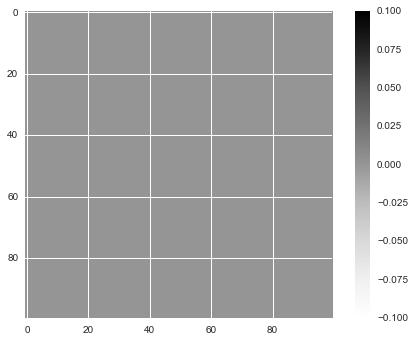

In [58]:
plt.imshow(np.cov(samples))
plt.colorbar()

In [59]:
print samples

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.